In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns       


In [2]:
df = pd.read_csv('student_depression_dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [4]:
df.info()
df.describe()  
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [5]:
df = df.drop(columns=['id','City','Profession','Work Pressure','Job Satisfaction','Gender'])
df.dropna(inplace=True)
df

,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27896,27.0,5.0,5.75,5.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,27.0,2.0,9.40,3.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,31.0,3.0,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,18.0,5.0,6.88,2.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [6]:
X = df.drop('Depression',axis=1)
y = df['Depression']

In [7]:

print(X.dtypes)

Age                                      float64
Academic Pressure                        float64
CGPA                                     float64
Study Satisfaction                       float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
dtype: object


In [8]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode binary categorical columns
#df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Have you ever had suicidal thoughts ?'] = label_encoder.fit_transform(df['Have you ever had suicidal thoughts ?'])
df['Family History of Mental Illness'] = label_encoder.fit_transform(df['Family History of Mental Illness'])


# Label encode multi-class categorical columns
df['Degree'] = label_encoder.fit_transform(df['Degree'])
df['Dietary Habits'] = label_encoder.fit_transform(df['Dietary Habits'])
df['Sleep Duration'] = label_encoder.fit_transform(df['Sleep Duration'])

# Verify the dataframe
print(df.head())

    Age  Academic Pressure  CGPA  Study Satisfaction  Sleep Duration  \
0  33.0                5.0  8.97                 2.0               0   
1  24.0                2.0  5.90                 5.0               0   
2  31.0                3.0  7.03                 5.0               2   
3  28.0                3.0  5.59                 2.0               1   
4  25.0                4.0  8.13                 3.0               0   

   Dietary Habits  Degree  Have you ever had suicidal thoughts ?  \
0               0       4                                      1   
1               1      11                                      0   
2               0       6                                      0   
3               1       8                                      1   
4               1      17                                      1   

   Work/Study Hours Financial Stress  Family History of Mental Illness  \
0               3.0              1.0                                 0   
1         

In [10]:
X = df.drop('Depression', axis=1)
y = df['Depression']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8449820788530465


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2348
           1       0.85      0.89      0.87      3232

    accuracy                           0.84      5580
   macro avg       0.84      0.84      0.84      5580
weighted avg       0.84      0.84      0.84      5580

[[1826  522]
 [ 343 2889]]


trying other models for better accuracy 

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.8401433691756273

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      2348
           1       0.85      0.89      0.87      3232

    accuracy                           0.84      5580
   macro avg       0.84      0.83      0.83      5580
weighted avg       0.84      0.84      0.84      5580


Confusion Matrix:
 [[1826  522]
 [ 370 2862]]


In [15]:
from sklearn.svm import SVC

# Train an SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.8453405017921147

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      2348
           1       0.85      0.90      0.87      3232

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.84      5580
weighted avg       0.85      0.85      0.84      5580


Confusion Matrix:
 [[1816  532]
 [ 331 2901]]


In [16]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8462365591397849

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      2348
           1       0.85      0.90      0.87      3232

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.84      5580
weighted avg       0.85      0.85      0.85      5580


Confusion Matrix:
 [[1819  529]
 [ 329 2903]]


In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate the model
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.7781362007168459

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.72      2348
           1       0.78      0.86      0.82      3232

    accuracy                           0.78      5580
   macro avg       0.78      0.76      0.77      5580
weighted avg       0.78      0.78      0.78      5580


Confusion Matrix:
 [[1573  775]
 [ 463 2769]]


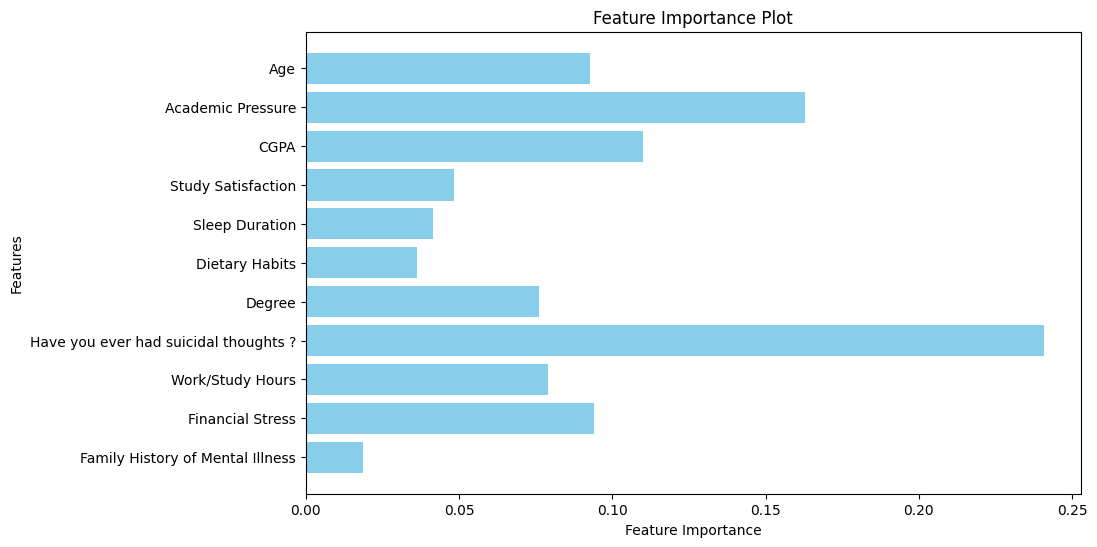

In [18]:
# Plot feature importance directly
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf_model.feature_importances_, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.8400962775795818


In [20]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Evaluate the model
y_pred_catboost = catboost_model.predict(X_test)

# Print evaluation metrics
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_catboost))
print("\nClassification Report:\n", classification_report(y_test, y_pred_catboost))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_catboost))

CatBoost Accuracy: 0.8417562724014337

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      2348
           1       0.84      0.89      0.87      3232

    accuracy                           0.84      5580
   macro avg       0.84      0.83      0.84      5580
weighted avg       0.84      0.84      0.84      5580


Confusion Matrix:
 [[1817  531]
 [ 352 2880]]


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train an SVM Classifier with RBF kernel
svm_rbf_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_rbf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svm_rbf = svm_rbf_model.predict(X_test)

# Print evaluation metrics
print("SVM with RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_svm_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_rbf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_rbf))

SVM with RBF Kernel Accuracy: 0.8455197132616488

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      2348
           1       0.84      0.90      0.87      3232

    accuracy                           0.85      5580
   macro avg       0.85      0.83      0.84      5580
weighted avg       0.85      0.85      0.84      5580


Confusion Matrix:
 [[1804  544]
 [ 318 2914]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Perform Grid Search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

# Evaluate on test data
y_pred = grid.best_estimator_.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  41.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  41.4s
